In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "./data/ES_BIDS/"
df = pd.read_parquet(data_path + "CAISO_ES_BIDS.parquet")

In [3]:
bid_cols = [col for col in df.columns if "bid" in col]
df = df.fillna(0)

In [4]:
y_1_date_range = [pd.Timestamp("2022-07-01"), pd.Timestamp("2023-07-01")]
y_2_date_range = [pd.Timestamp("2023-07-01"), pd.Timestamp("2024-07-01")]

y_1_df = df.loc[(df.index >= y_1_date_range[0]) & (df.index < y_1_date_range[1])]
y_2_df = df.loc[(df.index >= y_2_date_range[0]) & (df.index < y_2_date_range[1])]

In [15]:
AGGREGATION_GRANULARITY = "D"

# plot the capacity-normalized bids for every segment aggregated daily
bid_columns = [col for col in df.columns if "bid" in col]

# aggregate daily capacities (time-based average) from df
df_daily_aggregate = df[bid_columns].resample(AGGREGATION_GRANULARITY).mean()
df_daily_aggregate["bid_rtpd_neg_tot"] = sum(
    [df_daily_aggregate[col_name] for col_name in bid_columns if "rtpd_neg" in col_name]
)
df_daily_aggregate["bid_rtpd_pos_tot"] = sum(
    [df_daily_aggregate[col_name] for col_name in bid_columns if "rtpd_pos" in col_name]
)
df_daily_aggregate["bid_ifm_neg_tot"] = sum(
    [df_daily_aggregate[col_name] for col_name in bid_columns if "ifm_neg" in col_name]
)
df_daily_aggregate["bid_ifm_pos_tot"] = sum(
    [df_daily_aggregate[col_name] for col_name in bid_columns if "ifm_pos" in col_name]
)

# further, look at quarter-on-quarter changes (seasonally? calendar year? who knows...)

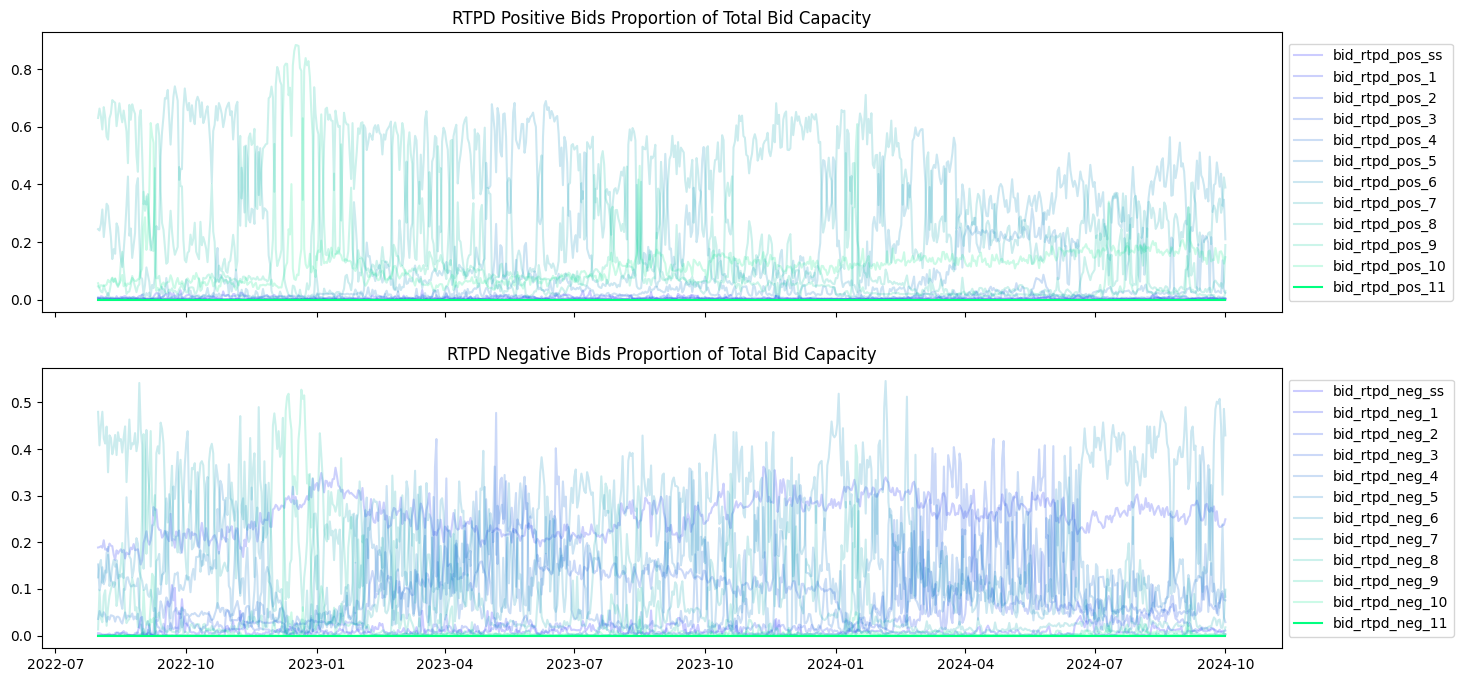

In [16]:
# plot rtpd
fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# set interest segment... all other segments have lower opacities
interest_segment = "11"

# Get the colormap
cmap = plt.get_cmap("winter")
colors = cmap(np.linspace(0, 1, len([col for col in bid_columns if "rtpd_pos" in col])))

# Plot rtpd_pos_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "rtpd_pos" in col]):
    if interest_segment in col:
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_pos_tot"],
            label=col,
            color=colors[i],
        )
    else:
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_pos_tot"],
            label=col,
            color=colors[i],
            alpha=0.2,
        )
axs[0].set_title("RTPD Positive Bids Proportion of Total Bid Capacity")

# Plot rtpd_neg_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "rtpd_neg" in col]):
    if interest_segment in col:
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_neg_tot"],
            label=col,
            color=colors[i],
        )
    else:
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_neg_tot"],
            label=col,
            color=colors[i],
            alpha=0.2,
        )
axs[1].set_title("RTPD Negative Bids Proportion of Total Bid Capacity")

# Move the legend off the right side of the plot
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

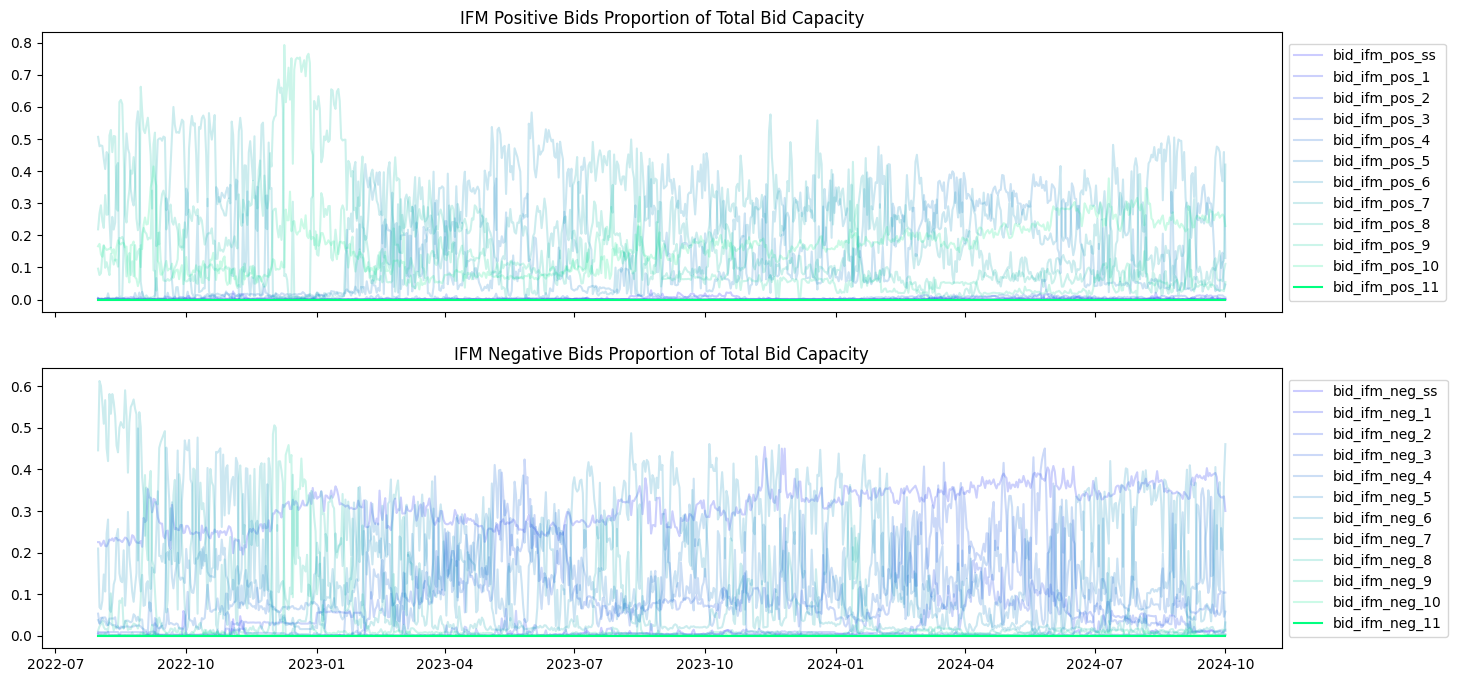

In [17]:
# plot ifm
fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Plot ifm_pos_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "ifm_pos" in col]):
    if interest_segment in col:
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_ifm_pos_tot"],
            label=col,
            color=colors[i],
        )
    else:
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_ifm_pos_tot"],
            label=col,
            color=colors[i],
            alpha=0.2,
        )
axs[0].set_title("IFM Positive Bids Proportion of Total Bid Capacity")

# Plot ifm_neg_x proportions with lowered opacity for non-interest segments
for i, col in enumerate([col for col in bid_columns if "ifm_neg" in col]):
    if interest_segment in col:
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_ifm_neg_tot"],
            label=col,
            color=colors[i],
        )
    else:
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_ifm_neg_tot"],
            label=col,
            color=colors[i],
            alpha=0.2,
        )
axs[1].set_title("IFM Negative Bids Proportion of Total Bid Capacity")

# Move the legend off the right side of the plot
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

ss


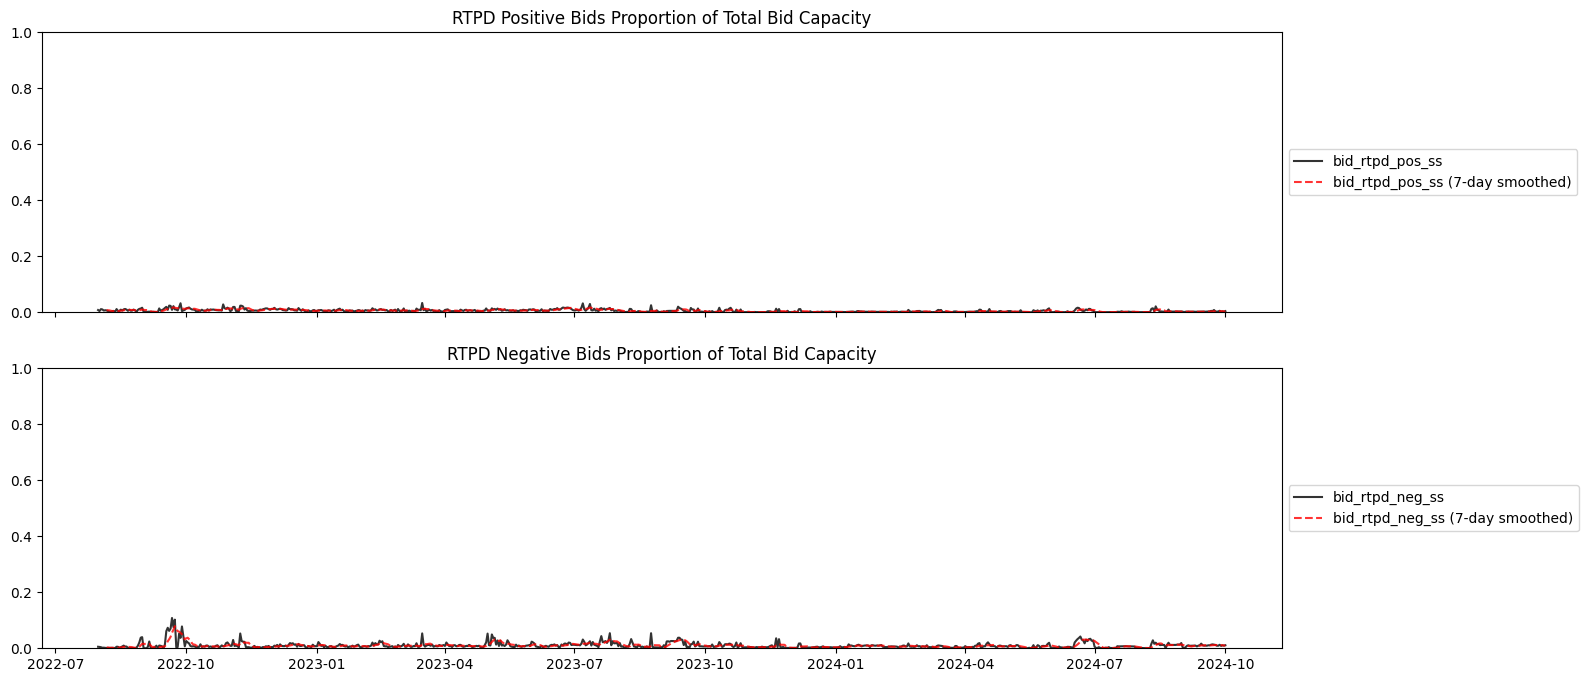

-0.0001135517859117019
1


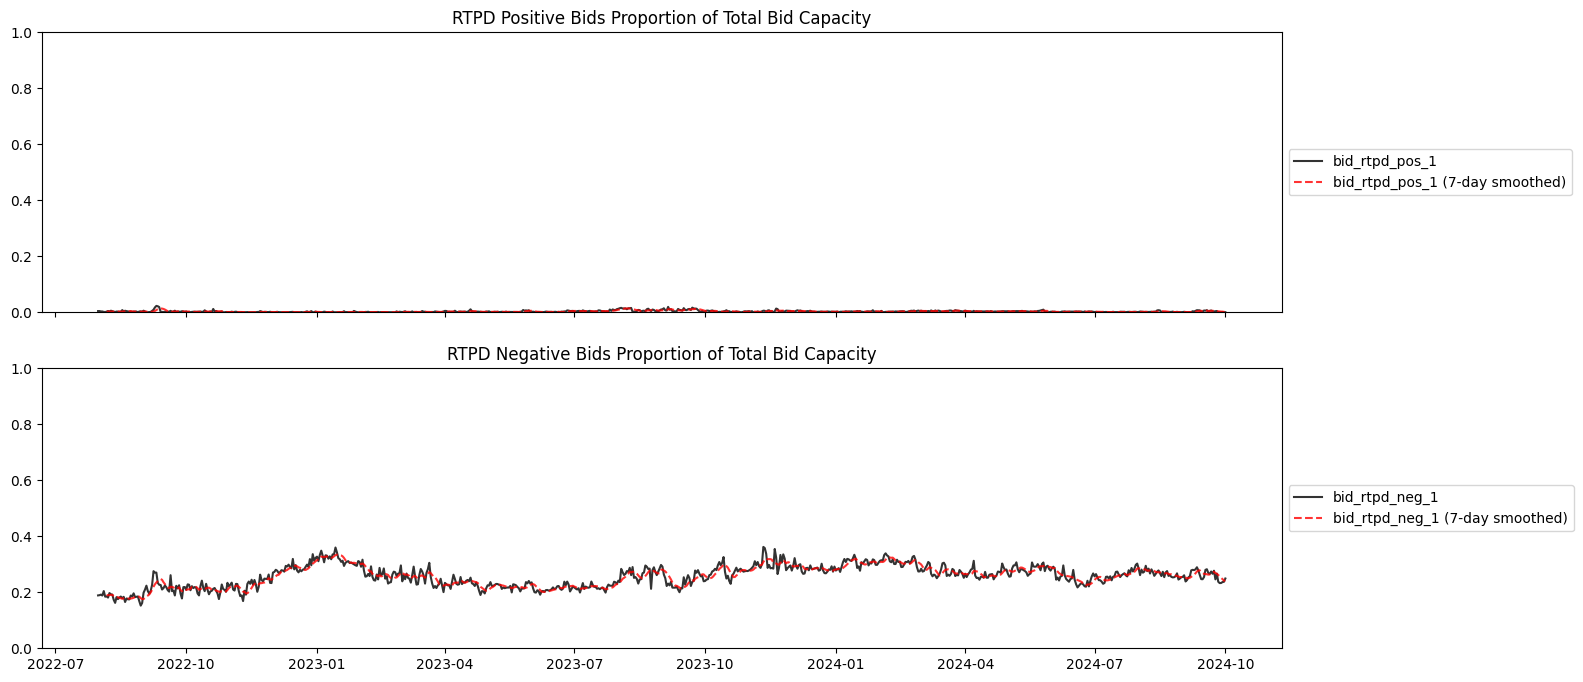

-0.1405205638549434
2


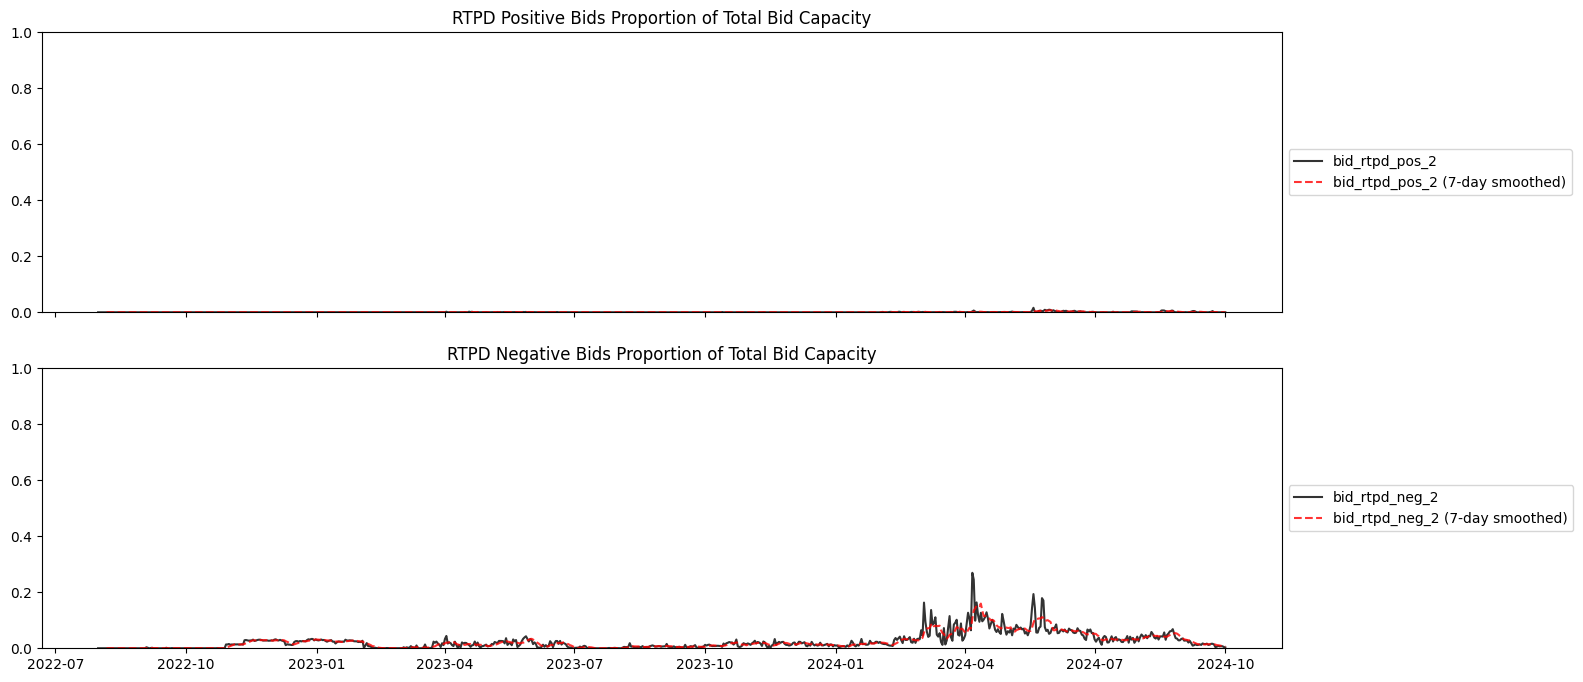

0.0
3


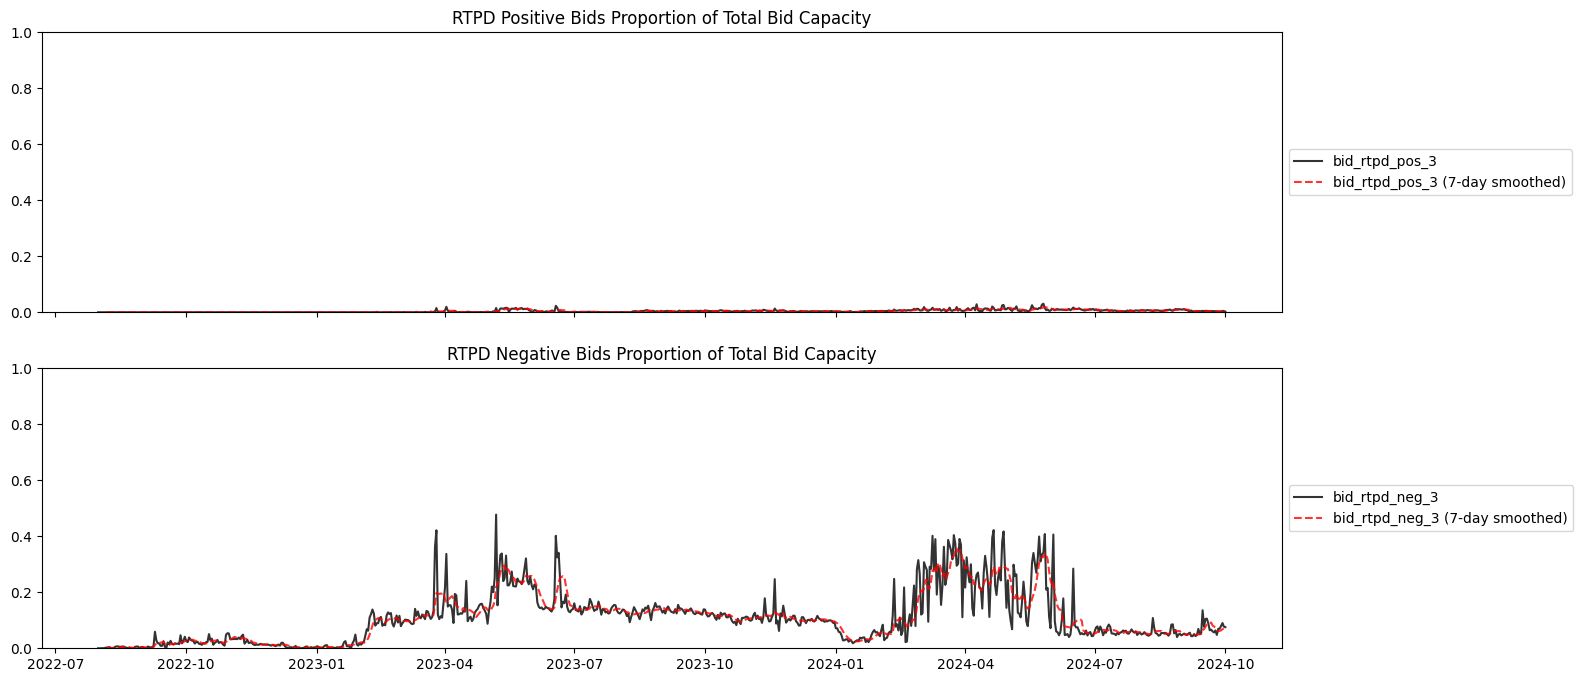

0.0
4


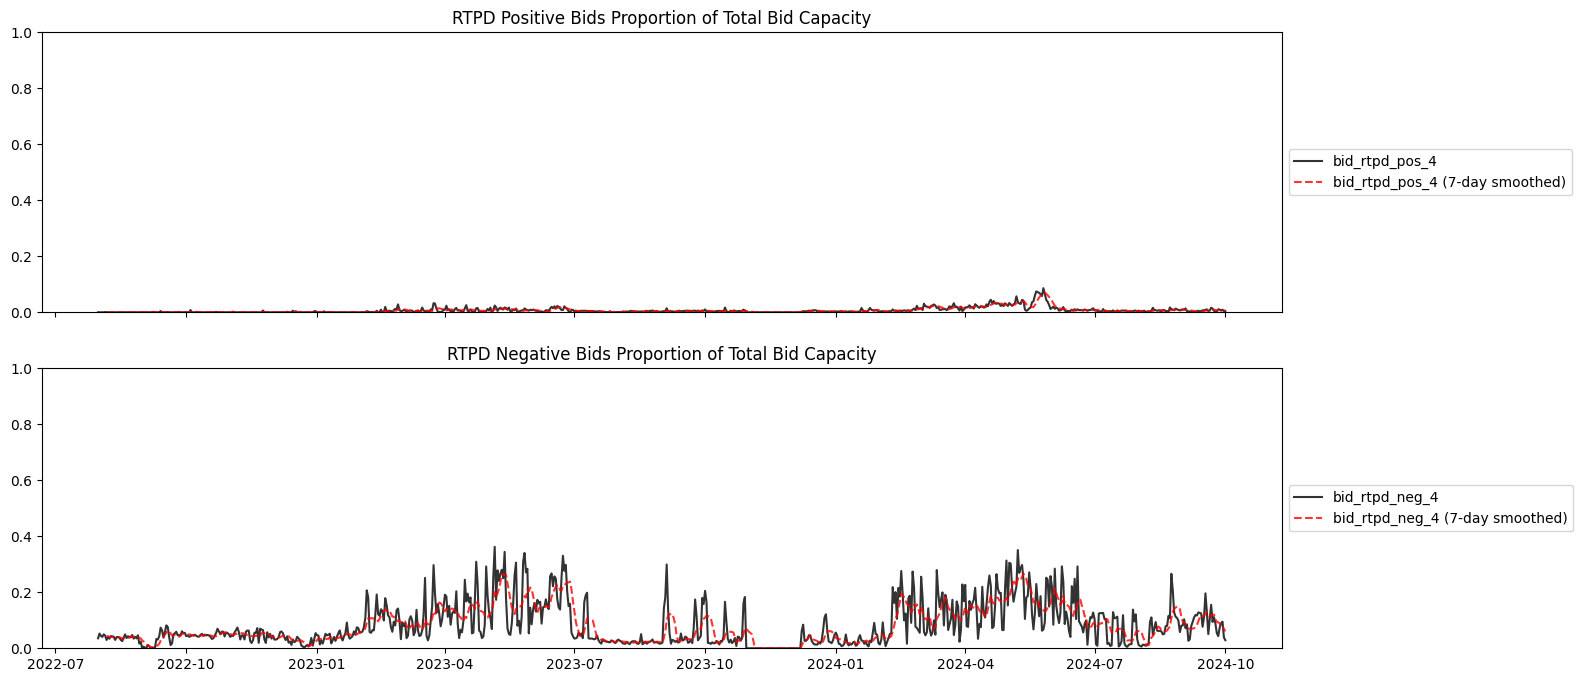

0.0
5


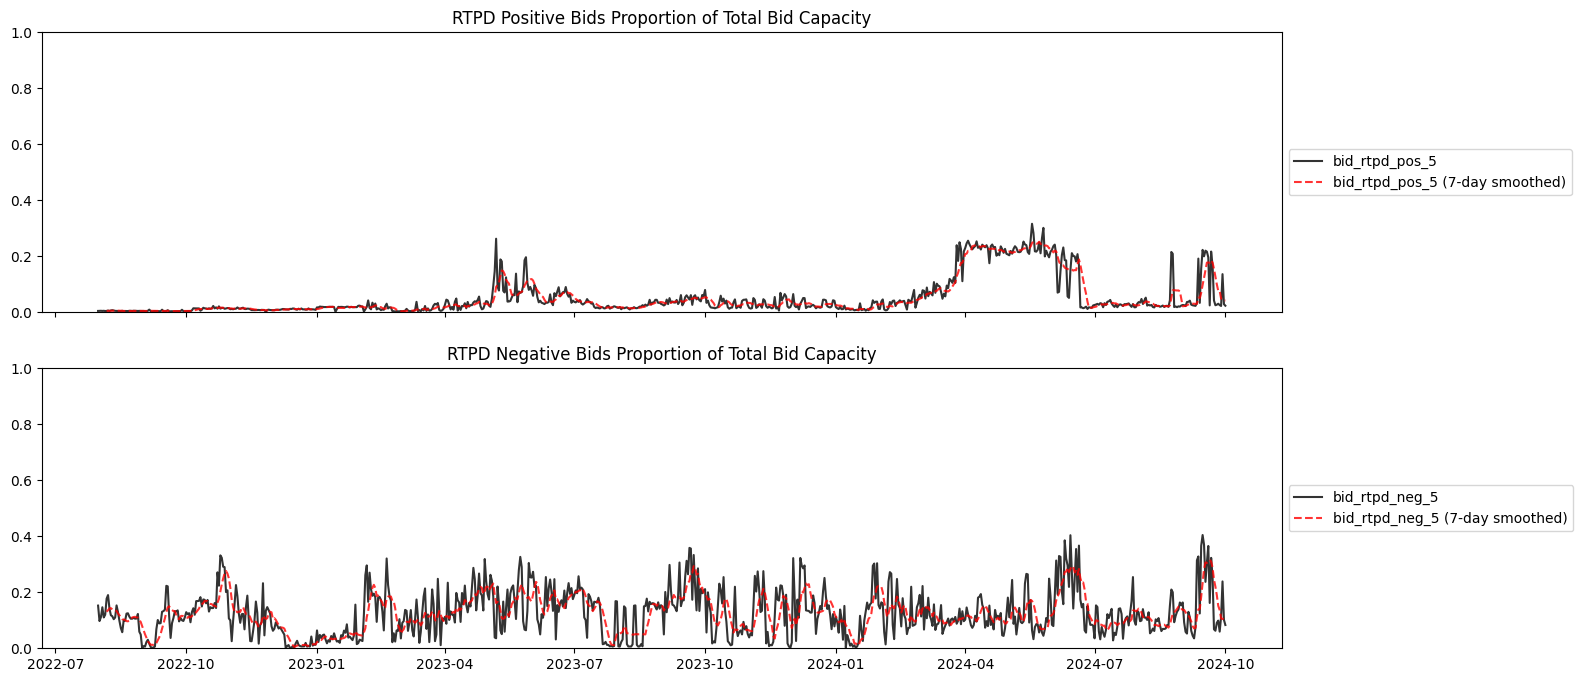

-0.00023496312279750467
6


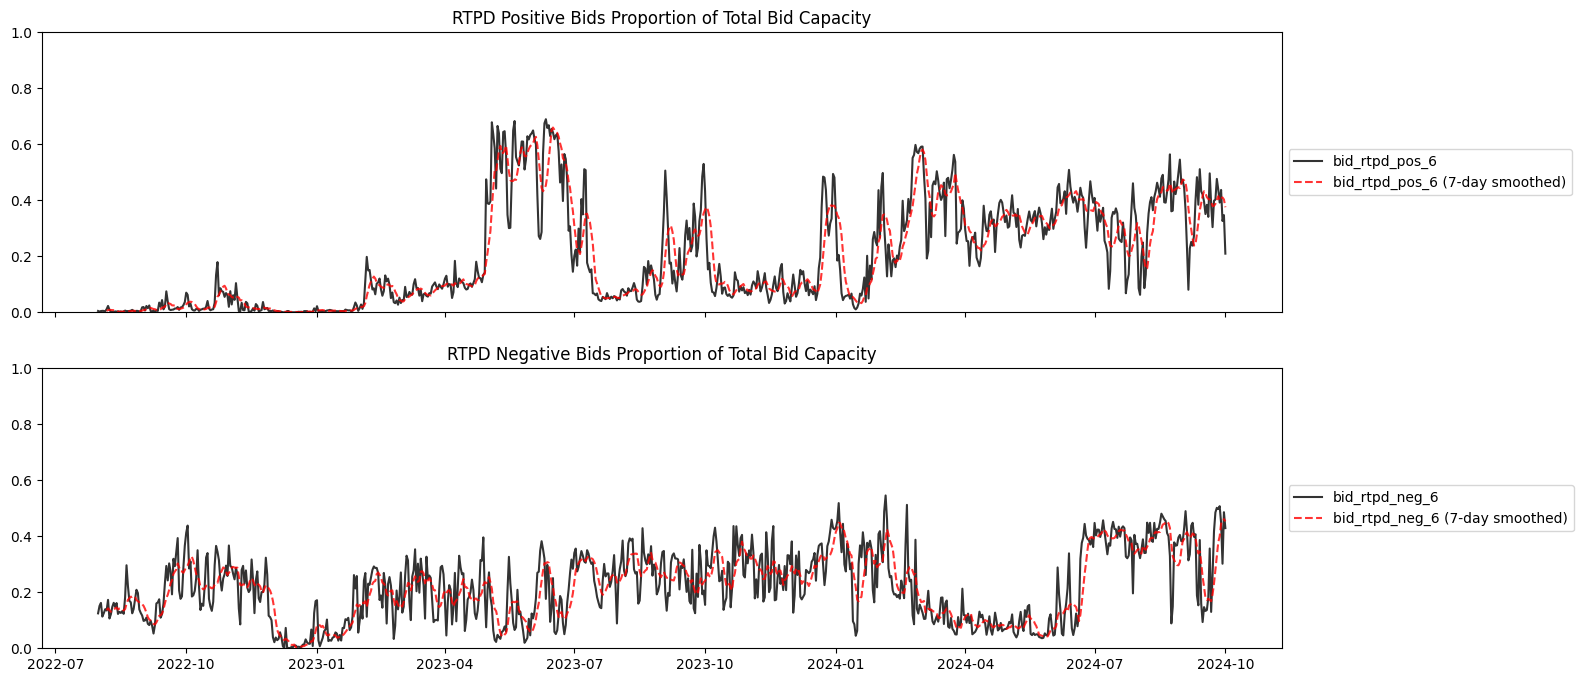

-0.00016383856356761038
7


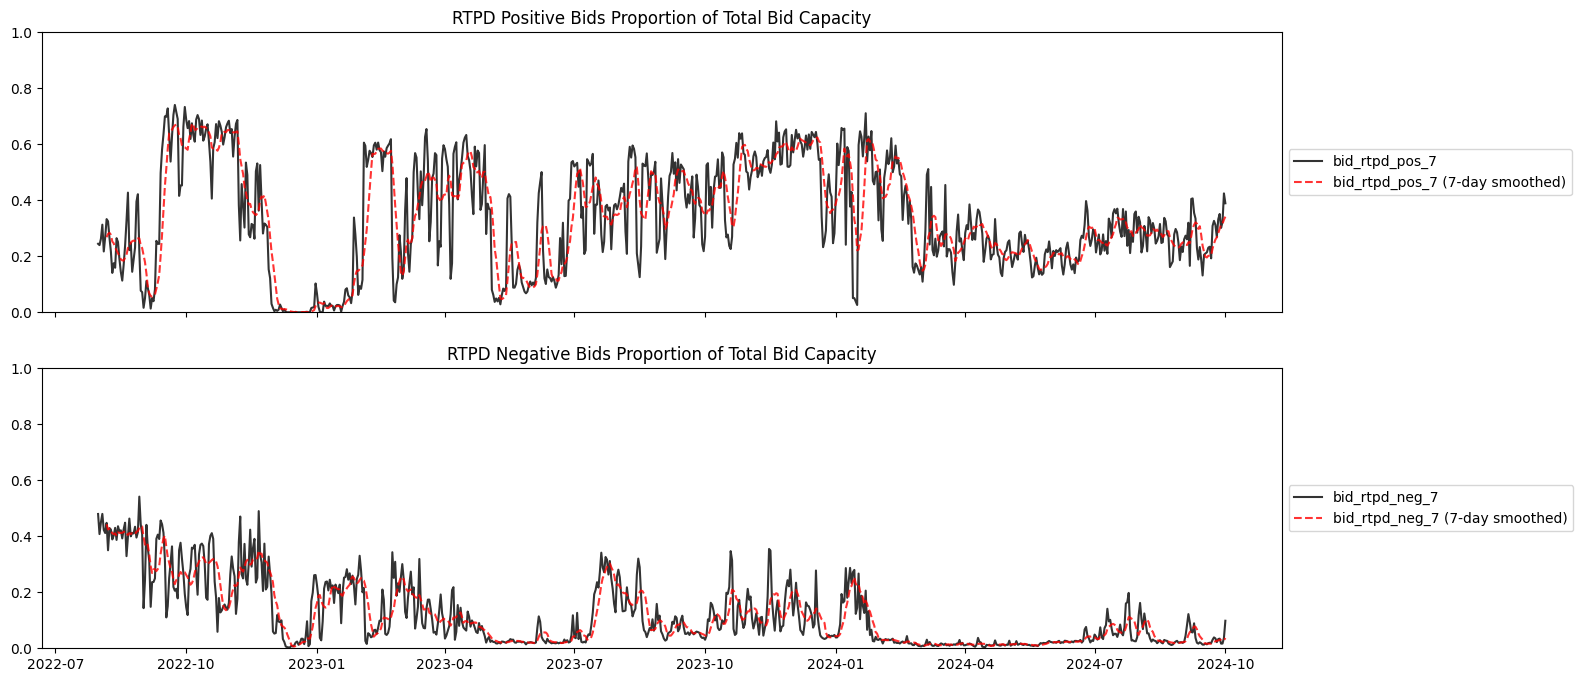

-0.0027100898017507614
8


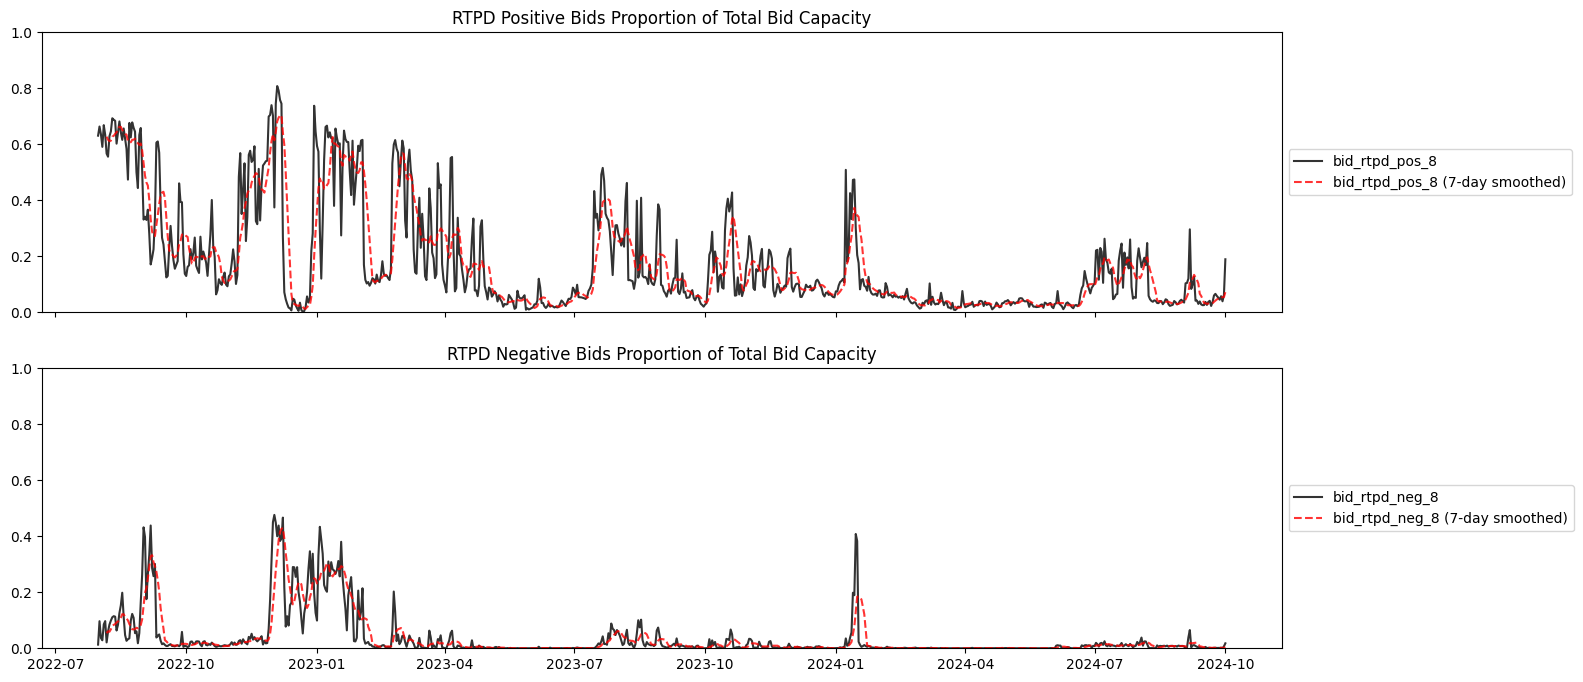

0.0
9


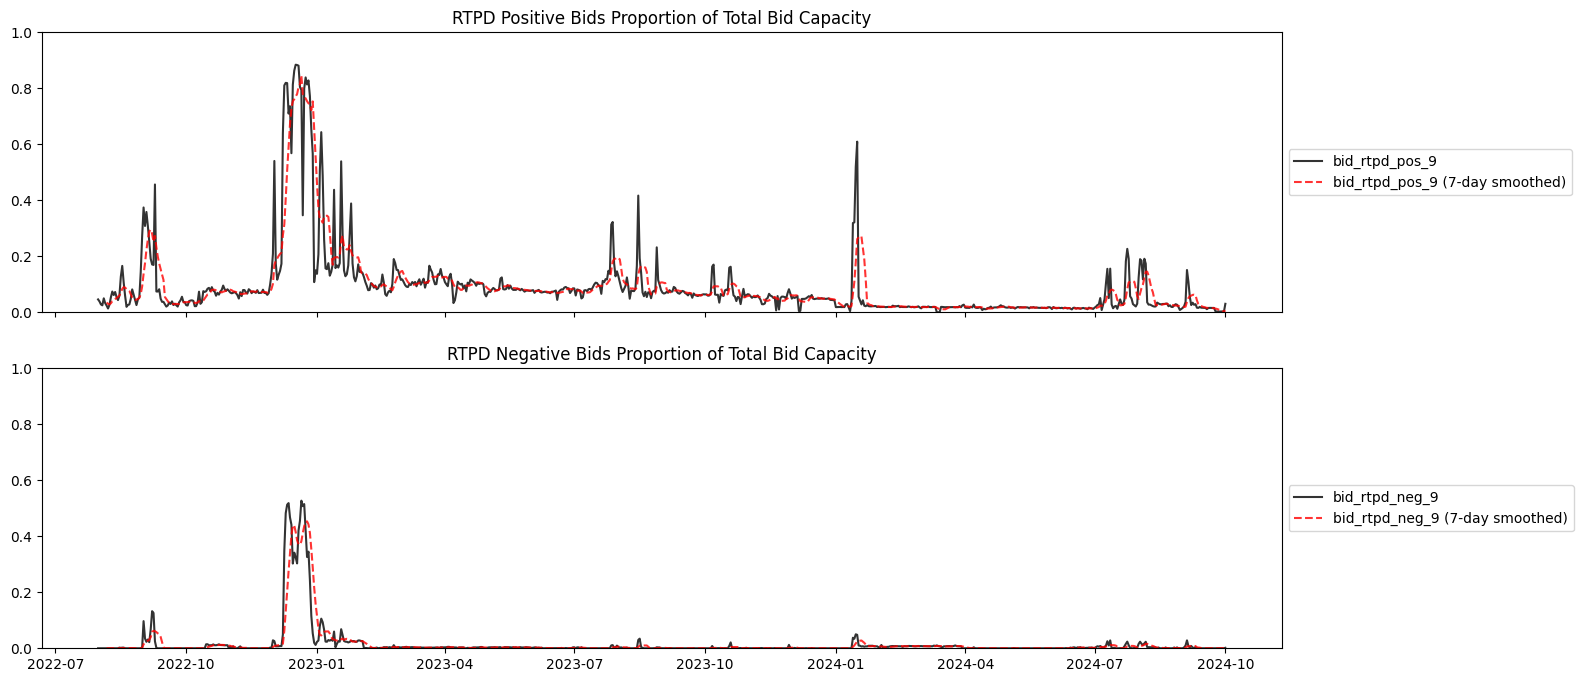

0.0
10


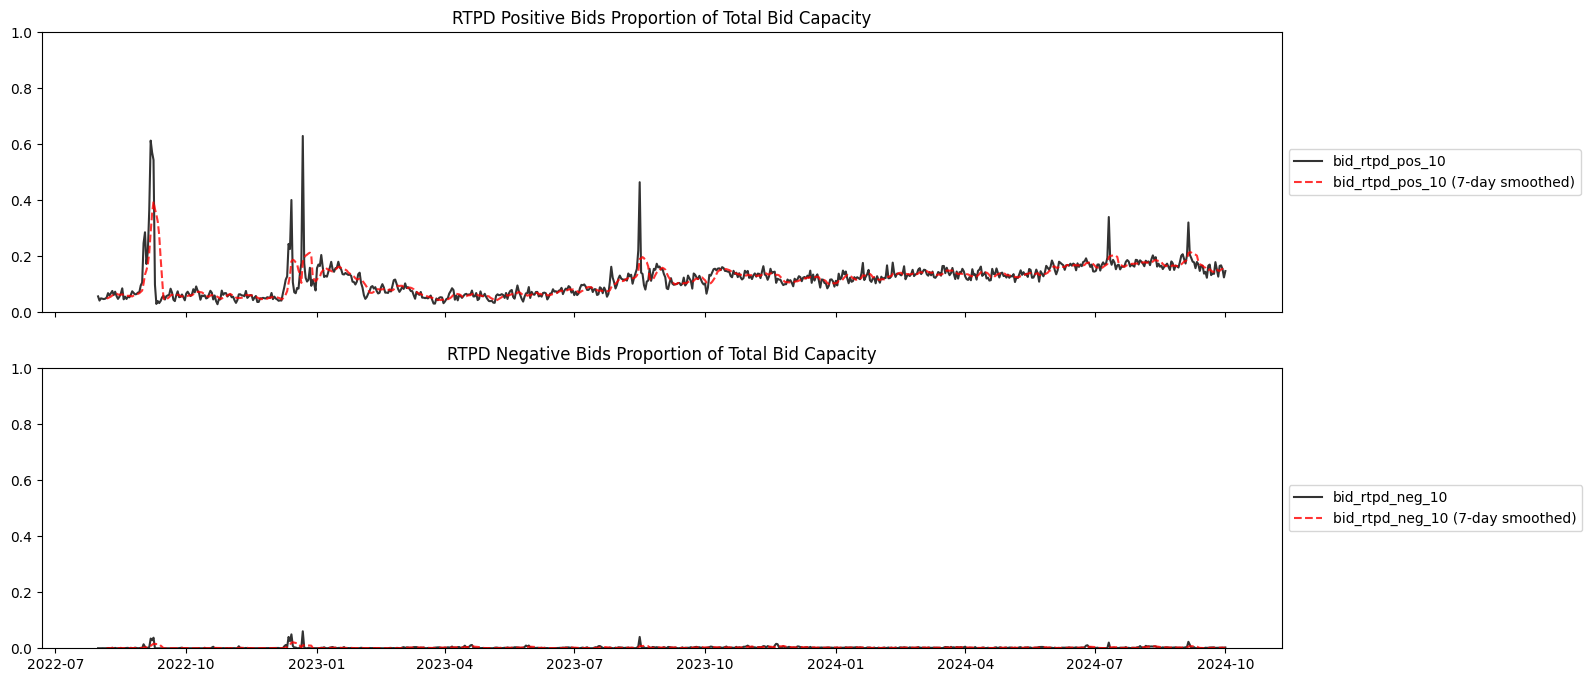

0.0


In [29]:
for interest_segment in ['ss'] + list(str(val + 1) for val in range(10)):
    print(interest_segment)
    # plot rtpd for interest segment
    fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

    # Plot rtpd_pos_x proportions for interest segment
    for i, col in enumerate([col for col in bid_columns if "rtpd_pos" in col and col.endswith("_" + interest_segment)]):
        axs[0].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_pos_tot"],
            label=col,
            color='black',
            alpha=0.8
        )
        # Add 7-day smoothed plot
        axs[0].plot(
            df_daily_aggregate.index,
            (df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_pos_tot"]).rolling(window=7).mean(),
            label=f"{col} (7-day smoothed)",
            linestyle='--',
            color='red',
            alpha=0.8
        )
    axs[0].set_title("RTPD Positive Bids Proportion of Total Bid Capacity")
    axs[0].set_ylim(0, 1)  # Adjust y-axis

    # Plot rtpd_neg_x proportions for interest segment
    for i, col in enumerate([col for col in bid_columns if "rtpd_neg" in col and col.endswith("_" + interest_segment)]):
        axs[1].plot(
            df_daily_aggregate.index,
            df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_neg_tot"],
            label=col,
            color='black',
            alpha=0.8
        )
        # Add 7-day smoothed plot
        axs[1].plot(
            df_daily_aggregate.index,
            (df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_neg_tot"]).rolling(window=7).mean(),
            label=f"{col} (7-day smoothed)",
            linestyle='--',
            color='red',
            alpha=0.8
        )
    axs[1].set_title("RTPD Negative Bids Proportion of Total Bid Capacity")
    axs[1].set_ylim(0, 1)  # Adjust y-axis

    # Move the legend off the right side of the plot
    axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))
    axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

    plt.show()
    print(max(df_daily_aggregate[col] / df_daily_aggregate["bid_rtpd_pos_tot"]))

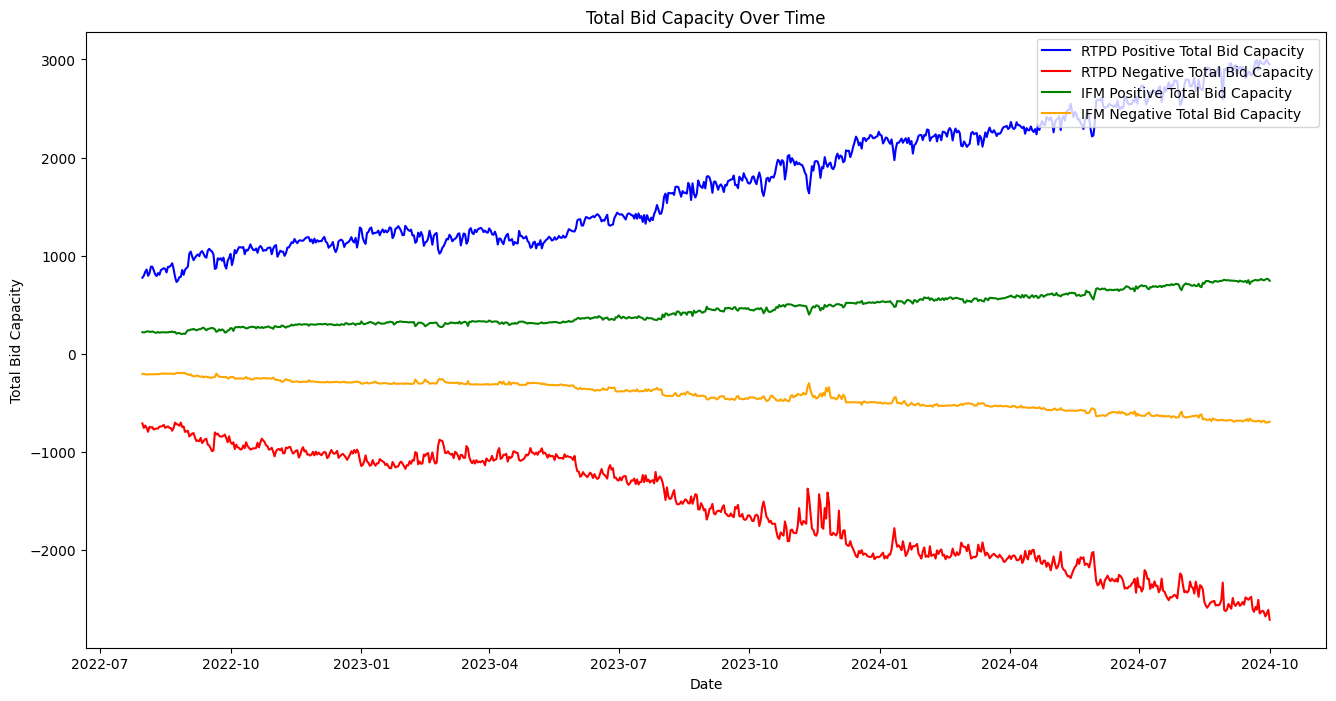

In [20]:
# Plot total bid capacity over time for both positive and negative RTPD and IFM bids
fig, ax = plt.subplots(figsize=(16, 8))

# Plot RTPD positive and negative total bid capacity
ax.plot(df_daily_aggregate.index, df_daily_aggregate["bid_rtpd_pos_tot"], label="RTPD Positive Total Bid Capacity", color="blue")
ax.plot(df_daily_aggregate.index, df_daily_aggregate["bid_rtpd_neg_tot"], label="RTPD Negative Total Bid Capacity", color="red")

# Plot IFM positive and negative total bid capacity
ax.plot(df_daily_aggregate.index, df_daily_aggregate["bid_ifm_pos_tot"], label="IFM Positive Total Bid Capacity", color="green")
ax.plot(df_daily_aggregate.index, df_daily_aggregate["bid_ifm_neg_tot"], label="IFM Negative Total Bid Capacity", color="orange")

# Set title and labels
ax.set_title("Total Bid Capacity Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Total Bid Capacity")

# Add legend
ax.legend(loc="upper right")

plt.show()